### (WIP) SART ERP analysis: data visualisation
An example of visualising auditory oddball data within multiple timepoints (or groups) at one channel.

In [48]:
# Import packages
import mne, os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

# Set the default directory
os.chdir('/Users/tanijarv/Documents/GitHub/EEG-pyline')
mne.set_log_level('error')

# Import functions
from basic.arrange_data import read_files

Define these variables!

In [57]:
# Folder where to get the clean epochs files
clean_folder = 'Data/Clean/'

# Folder where to save the plots
results_folder = 'Results/'

# Sub-folders for experiments (i.e. timepoints or groups) and their acronyms
exp_folder = 'LEISURE/T1/SART'
exp_condition = 'SART_T1'

# Export the figure to results folder or not
savefig = True

# Subjects which to not plot
exclude_subjects = [] # ['OKTOS_0019', 'OKTOS_0024', 'OKTOS_0033']

# Channel of interest
ch = 'Pz'

# Event names (i.e. different stimuli) within the epochs
event_list = ['GO trial', 'NO-GO trial']

Run this to generate the plots.

Files in Data/Clean/LEISURE/T1/SART read in: 93


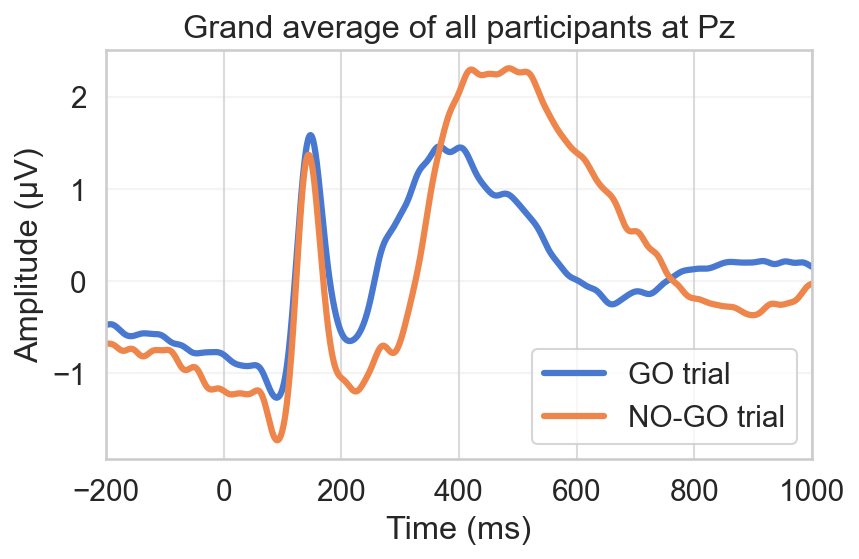

In [58]:
sns.set_theme(context='notebook', font_scale=1.3,
              style='whitegrid', palette='muted',
              font='sans-serif')

# Get directories of clean EEG files and exclude the pre-defined subjects
dir_inprogress = os.path.join(clean_folder, exp_folder)
file_dirs, subject_names = read_files(dir_inprogress, "_clean-epo.fif",
                                      exclude_subjects=exclude_subjects)

# Loop through all the subjects' directories (EEG files directories)
evoked_signal_go = [None]*len(file_dirs)
evoked_signal_nogo = [None]*len(file_dirs)
for i in range(len(file_dirs)):
    # Read the clean data from the disk
    epochs = mne.read_epochs(fname='{}/{}_clean-epo.fif'.format(dir_inprogress,
                                                                subject_names[i]),
                                                                verbose=False)
    
    # Create an averaged evoked object from epochs for both events
    evoked_signal_go[i] = epochs['GO trial'].average(picks=ch)
    evoked_signal_nogo[i] = epochs['NO-GO trial'].average(picks=ch)

# Average all the averaged evoked objects, thereby creating a grand average signals
go_master_grand_evoked_data = mne.grand_average(evoked_signal_go).data[0]*1e6
go_master_grand_evoked_times = mne.grand_average(evoked_signal_go).times*1e3
nogo_master_grand_evoked_data = mne.grand_average(evoked_signal_nogo).data[0]*1e6
nogo_master_grand_evoked_times = mne.grand_average(evoked_signal_nogo).times*1e3

# Plot all experiments' grand average signals on a single plot
fig, ax = plt.subplots(figsize=(6, 4), layout='tight', dpi=150)
ax.plot(go_master_grand_evoked_times, go_master_grand_evoked_data, linewidth=3)
ax.plot(nogo_master_grand_evoked_times, nogo_master_grand_evoked_data, linewidth=3)
ax.legend(event_list)
ax.set_title('Grand average of all participants at {}'.format(ch))
ax.set_xlim([-200, 1000])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude (µV)')
ax.grid(which='major', axis='y', alpha=0.2)
ax.grid(which='major', axis='x', alpha=0.7)
if savefig == True:
    plt.savefig(fname='{}/{}/GRAND_erpfig_{}.png'.format(results_folder, exp_folder, ch),
                dpi=300)
plt.show()
